# Mitochondrial DNA growth: timeseries analysis

In [1]:
import itertools
import datetime
import json
import hashlib
from pprint import pprint

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

Open file:

In [3]:
#data_file = "mito-ts_2018-10-18_15:29:45.json"
data_file = "mito-ts.json"

In [4]:
with open(data_file, 'rU') as fd:
    df = json.load(fd)

In [5]:
print("Simulation results read from: %s" % (data_file))

Simulation results read from: mito-ts.json


In [6]:
meta_data = df['META'] ; meta_data

{u'run_length': 35040,
 u'samples_per_day': 96,
 u'wild_type': u'd579049f4538beef5fe8ec13febdb06cfc7ffd8da544d763826405e1'}

In [7]:
RUN_LENGTH = meta_data['run_length']

In [8]:
#ind2 = pd.date_range(start="2018-1-1",periods=RUN_LENGTH,freq='15min') 

In [9]:
sample_rate = meta_data['samples_per_day']
wild_type = meta_data['wild_type'] ; wild_type

u'd579049f4538beef5fe8ec13febdb06cfc7ffd8da544d763826405e1'

In [10]:
data_dct = df['DATA']
pop_count = df['TOTAL']
#atp_count = df['ATP']
species_count = df['NO_SPECIES']
atp = df['ATP']

In [11]:
data_dct[wild_type][1][-1]

955

## Plot Data

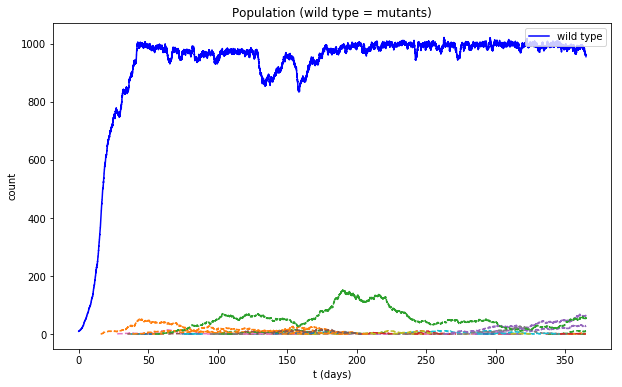

In [12]:
plt.figure(figsize=(10,6))

for k in data_dct:
    
    tstart = data_dct[k][0]
    data = data_dct[k][1]
    data_len = len(data)
    
    #ind = [i/float(sample_rate) for i in range(tstart,tstart+data_len)]
    ind = pd.Series([i / float(sample_rate) for i in range(tstart,tstart+data_len)])
    if k == wild_type:
        plt.plot(ind, data, "b-", label="wild type")
    else:
        plt.plot(ind, data, linestyle='dashed')

plt.title("Population (wild type = mutants)")
plt.xlabel("t (days)")
plt.ylabel("count")
plt.legend(loc="upper right")

In [13]:
mut_count = [x-y  for x,y in zip(pop_count,data_dct[wild_type][1])]

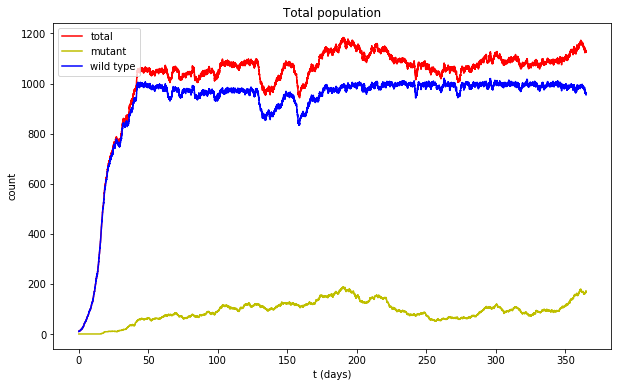

In [14]:
plt.figure(figsize=(10,6))
#ind = [i/float(sample_rate) for i in xrange(len(pop_count))]

ind = pd.Series([i / float(sample_rate) for i in range(len(pop_count))])
plt.plot(ind, pop_count, "r-", label="total")   
ind = pd.Series([i / float(sample_rate) for i in range(len(mut_count))])
plt.plot(ind, mut_count, "y-", label="mutant")   

plt.plot(ind, data_dct[wild_type][1], "b-", label="wild type")

plt.title("Total population")
plt.xlabel("t (days)")
plt.ylabel("count")
plt.legend(loc="upper left")

Text(0,0.5,'count')

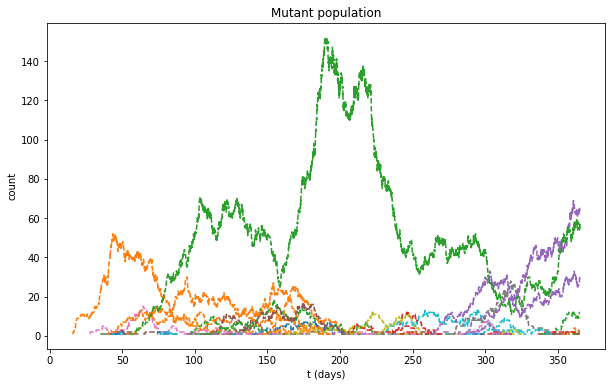

In [15]:
plt.figure(figsize=(10,6))

for k in data_dct:
    
    tstart = data_dct[k][0]
    data = data_dct[k][1]
    data_len = len(data)

    #ind = [i/float(sample_rate) for i in range(tstart,tstart+data_len)]
    ind = pd.Series([i / float(sample_rate) for i in range(tstart,tstart+data_len)])
    if k != wild_type:
        plt.plot(ind, data, linestyle='dashed')
    
plt.title("Mutant population")    
plt.xlabel("t (days)")
plt.ylabel("count")

Text(0,0.5,'count')

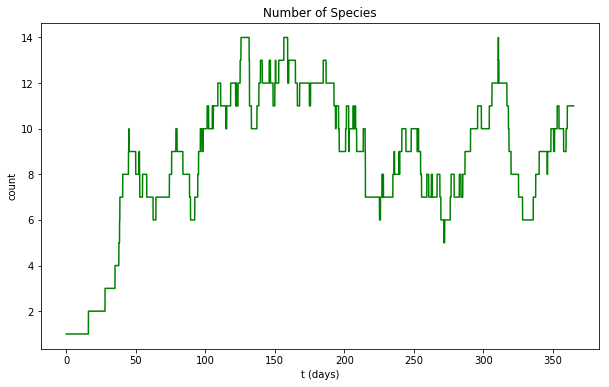

In [16]:
plt.figure(figsize=(10,6))
#ind = [i/float(sample_rate) for i in xrange(len(species_count))]
ind = pd.Series([i / float(sample_rate) for i in range(len(species_count))])
plt.plot(ind,species_count, "g-")  
plt.title("Number of Species")
plt.xlabel("t (days)")
plt.ylabel("count")

In [17]:
len(atp)

35040

Text(0,0.5,'ATP')

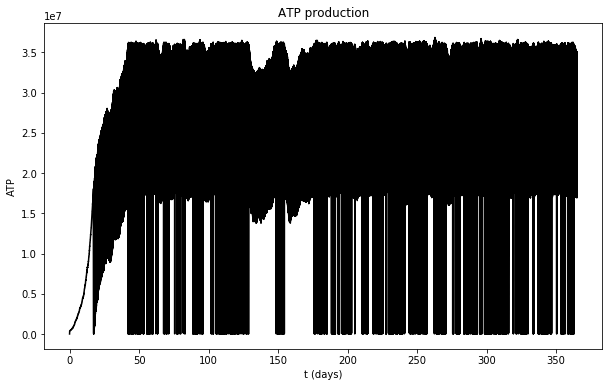

In [18]:
plt.figure(figsize=(10,6))
ind = pd.Series([i / float(sample_rate) for i in range(len(atp))])
plt.plot(ind,atp, "k-")  
plt.title("ATP production")
plt.xlabel("t (days)")
plt.ylabel("ATP")

In [19]:
#?pd.date_range